<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_01_EDA_extradata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

## 1.0 Functions:

In [4]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

## **Importing the Dataset**

## **Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [5]:
df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/new_train.csv", index_col=0)
df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/new_test.csv", index_col=0)

df_test.shape

(3644, 508)

In [6]:
df_train.p_num.unique()

array(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12'],
      dtype=object)

In [7]:
df_train.head(5)

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,...,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,minute,obv_n
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,9.6,9.6,9.6,9.6,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,11.8,12.1,12.5,12.8,13.2,13.5,13.9,14.0,14.1,14.2,14.2,14.2,14.2,14.6,15.0,15.4,16.0,16.6,17.2,17.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.4,6,10,0.0
p01_1,p01,9.7,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,11.8,12.1,12.5,12.8,13.2,13.5,13.9,14.0,14.1,14.2,14.2,14.2,14.2,14.6,15.0,15.4,16.0,16.6,17.2,17.5,17.9,18.2,18.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.8,6,25,1.0
p01_2,p01,9.2,9.2,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,11.8,12.1,12.5,12.8,13.2,13.5,13.9,14.0,14.1,14.2,14.2,14.2,14.2,14.6,15.0,15.4,16.0,16.6,17.2,17.5,17.9,18.2,18.3,18.3,18.4,18.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5,6,40,2.0
p01_3,p01,8.7,8.7,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,11.8,12.1,12.5,12.8,13.2,13.5,13.9,14.0,14.1,14.2,14.2,14.2,14.2,14.6,15.0,15.4,16.0,16.6,17.2,17.5,17.9,18.2,18.3,18.3,18.4,18.3,18.1,18.0,17.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.8,6,55,3.0
p01_4,p01,8.4,8.4,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,11.8,12.1,12.5,12.8,13.2,13.5,13.9,14.0,14.1,14.2,14.2,14.2,14.2,14.6,15.0,15.4,16.0,16.6,17.2,17.5,17.9,18.2,18.3,18.3,18.4,18.3,18.1,18.0,17.8,17.5,17.3,17.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,7,10,4.0


In [15]:
train_adv = df_train.copy()
test_adv = df_test.copy()

In [25]:
train_adv['time'] = pd.to_datetime(train_adv['hour'].astype(str) + ':' + train_adv['minute'].astype(str), format='%H:%M')
test_adv['time'] = pd.to_datetime(test_adv['hour'].astype(str) + ':' + test_adv['minute'].astype(str), format='%H:%M')

In [26]:
train_adv['time'] - pd.Timedelta(minutes=10)

,time
id,
p01_0,1900-01-01 06:00:00
p01_1,1900-01-01 06:15:00
p01_2,1900-01-01 06:30:00
p01_3,1900-01-01 06:45:00
p01_4,1900-01-01 07:00:00
...,...
p12_25294,1900-01-01 23:25:00
p12_25295,1900-01-01 23:30:00
p12_25296,1900-01-01 23:35:00


In [9]:
df_all = pd.concat([df_train,df_test])

In [10]:
df_train.isna().sum().sum(),df_test.isna().sum().sum(),df_all.isna().sum().sum()

(0, 0, 3644)

In [11]:
df_train.head()
df_train.hour.unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5])

In [12]:
df_total_verify = pd.concat([df_train,df_test],axis=0)
df_total_verify.shape

(180668, 509)

In [13]:
#df_total_verify.groupby(["hour","p_num"])["bg-0:00"].agg(["mean"]).unstack("p_num").plot(color=palette_8)

## **EXTRACT ADDITIONAL DATA**

In [14]:
#six float features
feats=['bg','insulin','hr','steps','cals','activity','carbs']
ts=['-5:55', '-5:50', '-5:45', '-5:40', '-5:35', '-5:30', '-5:25', '-5:20', '-5:15', '-5:10', '-5:05', '-5:00', '-4:55', '-4:50', '-4:45', '-4:40', '-4:35', '-4:30', '-4:25', '-4:20', '-4:15', '-4:10', '-4:05', '-4:00', '-3:55', '-3:50', '-3:45', '-3:40', '-3:35', '-3:30', '-3:25', '-3:20', '-3:15', '-3:10', '-3:05', '-3:00', '-2:55', '-2:50', '-2:45', '-2:40', '-2:35', '-2:30', '-2:25', '-2:20', '-2:15', '-2:10', '-2:05', '-2:00', '-1:55', '-1:50', '-1:45', '-1:40', '-1:35', '-1:30', '-1:25', '-1:20', '-1:15', '-1:10', '-1:05', '-1:00', '-0:55', '-0:50', '-0:45', '-0:40', '-0:35', '-0:30', '-0:25', '-0:20', '-0:15', '-0:10', '-0:05', '-0:00']
def get_more_data(df,timestep,mode='train'):#mode is train or test
    full_data=[]
    #12step is 1 hour.
    for start in range(0,len(ts)-timestep-12):
        end=start+timestep
        target=end+12
        #[start:end] target
        hours_data=df[['p_num']+[f+ts[i]  for i in range(start,end) for f in feats]+['bg'+ts[target]]]
        hours_data.columns=['p_num']+[f+str(i-start)  for i in range(start,end)for f in feats]+['bg+1:00']
        hours_data=hours_data[~hours_data['bg+1:00'].isna()]
        full_data.append(hours_data)
    if mode=='test':
        hours_data=df[['p_num']+[f+ts[i]  for i in range(len(ts)-timestep,len(ts)) for f in feats]]
        hours_data.columns=['p_num']+[f+str(i-len(ts)+timestep)  for i in range(len(ts)-timestep,len(ts))for f in feats]
        full_data.append(hours_data)
    full_data=pd.concat(full_data).drop_duplicates()
    return full_data

In [ ]:
df_train.minute.unique()

array([10, 25, 40, 55, 45,  0, 15, 30, 20, 35, 50,  5])

In [ ]:
def FE(df,mode='train',timestep=32):      #mode='train' or 'test'
    #mean_isnan is 0.98 ,id is useless.
    print("< drop useless columns >")
    df.drop(['id'],axis=1,inplace=True)

    # #nearest bgs' correlation is greater than 0.99.
    # print("< fillna >")
    # bgs=[c for c in list(df.columns) if (c!='bg+1:00') and ('bg' in c)]
    # df[bgs] = df[bgs].fillna(method='ffill', axis=1)
    # df[bgs] = df[bgs].fillna(method='bfill', axis=1)

    # #long tail distribution
    # print("< log1p transform >")
    # step_cols=[c for c in list(df.columns) if 'step' in c]
    # df[step_cols]=df[step_cols].fillna(50).astype(np.float32)
    # df[step_cols]=np.log1p(df[step_cols])

    # #transform None to np.nan.
    # print("< fix bug >")
    # float_cols=[c for c in df.columns  for f in feats[:-1] if f in c]
    # df[float_cols]=df[float_cols].astype(np.float32)

    print("< get more data >")
    df=get_more_data(df,timestep=timestep,mode=mode)
    #p_num to int
    # df['p_num_int']=df['p_num'].apply(lambda x:int(x[1:])).astype(np.int8)
    # #fillna -1
    # float_cols=[col+str(ts) for ts in range(timestep) for col in ['bg','insulin','hr','steps','cals']]
    # df[float_cols]=df[float_cols].fillna(-1)

    # #activity to str then drop them.
    # print("< activity to str >")
    # activity_cols=[c for c in list(df.columns) if 'activity' in c]
    # activity_feats=df[activity_cols].astype(str).replace('None','').values
    # df['activity_str']=[' '.join(activity_feats[i]) for i in range(len(activity_feats))]
    # df.drop(activity_cols,axis=1,inplace=True)

    # print("< Z-score feature >")
    # cols=['bg', 'insulin','steps','hr','cals']
    # for col in cols:
    #     df[f'mean_pnum_{col}{timestep-1}']=df.groupby(['p_num'])[col+f"{timestep-1}"].transform('mean')
    #     df[f'std_pnum_{col}{timestep-1}']=df.groupby(['p_num'])[col+f"{timestep-1}"].transform('std')
    #     df[f'norm_pnum_{col}{timestep-1}']=(df[f'{col}{timestep-1}']-df[f'mean_pnum_{col}{timestep-1}'])/df[f'std_pnum_{col}{timestep-1}']
    # print("< cross feature >")
    # cross=['bg', 'insulin','steps','hr','cals']
    # for i in range(len(cross)):
    #     for j in range(i+1,len(cross)):
    #         for k in [1]:
    #             df[cross[i]+f"{timestep-k}+"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]+df[cross[j]+f"{timestep-k}"]
    #             df[cross[i]+f"{timestep-k}-"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]-df[cross[j]+f"{timestep-k}"]
    #             df[cross[i]+f"{timestep-k}*"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]*df[cross[j]+f"{timestep-k}"]
    #             df[cross[i]+f"{timestep-k}/"+cross[j]+f"{timestep-k}"]=df[cross[i]+f"{timestep-k}"]/(df[cross[j]+f"{timestep-k}"]+1e-15)
    # #strong correlation between nearest columns
    # df.drop([f'bg{i}'for i in range(timestep) if i%2!=0],axis=1,inplace=True)
    return df

In [ ]:
df_train_ = df_train.reset_index()
df_test_ = df_test.reset_index()

train=FE(df_train_,mode='train')
test=FE(df_test_,mode='test')
total=pd.concat((train,test))
test=total[total['bg+1:00'].isna()]
train=total[~total['bg+1:00'].isna()]
print(train.shape,test.shape,total.shape)
train.head()

< drop useless columns >
< get more data >
< drop useless columns >
< get more data >
(2100934, 226) (3644, 226) (2104578, 226)


,p_num,bg0,insulin0,hr0,steps0,cals0,activity0,carbs0,bg1,insulin1,hr1,steps1,cals1,activity1,carbs1,bg2,insulin2,hr2,steps2,cals2,activity2,carbs2,bg3,insulin3,hr3,steps3,cals3,activity3,carbs3,bg4,insulin4,hr4,steps4,cals4,activity4,carbs4,bg5,insulin5,hr5,steps5,cals5,activity5,carbs5,bg6,insulin6,hr6,steps6,cals6,activity6,carbs6,...,bg25,insulin25,hr25,steps25,cals25,activity25,carbs25,bg26,insulin26,hr26,steps26,cals26,activity26,carbs26,bg27,insulin27,hr27,steps27,cals27,activity27,carbs27,bg28,insulin28,hr28,steps28,cals28,activity28,carbs28,bg29,insulin29,hr29,steps29,cals29,activity29,carbs29,bg30,insulin30,hr30,steps30,cals30,activity30,carbs30,bg31,insulin31,hr31,steps31,cals31,activity31,carbs31,bg+1:00
0,p01,9.6,0.0083,68.8,32.0,9.85,0.0,0.0,9.6,0.0083,69.2,54.0,8.37,0.0,0.0,9.6,0.0083,69.0,54.0,8.57,0.0,0.0,9.6,0.0083,68.4,45.0,8.88,0.0,0.0,9.7,0.0083,68.3,49.0,8.95,0.0,0.0,9.7,0.0083,69.1,46.0,8.05,0.0,0.0,9.5,0.0083,68.9,30.0,8.04,0.0,0.0,...,10.6,0.0083,63.0,6.0,5.17,0.0,0.0,11.1,0.0083,63.4,2.0,5.28,0.0,0.0,11.3,0.0083,63.6,9.0,5.05,0.0,0.0,11.6,0.0083,62.8,0.0,5.06,0.0,0.0,11.8,0.0083,63.6,27.0,5.27,0.0,0.0,12.1,0.0083,63.3,32.0,5.10,0.0,0.0,12.5,0.0083,63.8,15.0,5.04,0.0,0.0,15.4
1,p01,9.7,0.0083,69.0,47.0,9.05,0.0,0.0,9.7,0.0083,69.4,49.0,9.15,0.0,0.0,9.7,0.0083,69.0,46.0,8.05,0.0,0.0,9.5,0.0083,68.7,29.0,8.04,0.0,0.0,9.4,0.0083,68.9,35.0,8.25,0.0,0.0,9.2,0.0083,66.3,25.0,8.61,0.0,0.0,9.0,0.0083,65.5,33.0,8.42,0.0,0.0,...,11.6,0.0083,63.6,6.0,5.15,0.0,0.0,11.8,0.0083,63.8,24.0,5.31,0.0,0.0,12.1,0.0083,63.3,32.0,5.10,0.0,0.0,12.5,0.0083,63.7,15.0,5.04,0.0,0.0,12.8,0.0083,63.6,12.0,5.15,0.0,0.0,13.2,0.0083,63.2,3.0,5.35,0.0,0.0,13.5,0.0083,61.9,2.0,4.95,0.0,0.0,17.2
2,p01,9.2,0.0083,68.7,30.0,8.04,0.0,0.0,9.2,0.0083,68.7,36.0,8.17,0.0,0.0,9.2,0.0083,66.2,25.0,8.61,0.0,0.0,9.0,0.0083,65.6,33.0,8.42,0.0,0.0,8.9,0.0083,65.2,16.0,8.48,0.0,0.0,8.7,0.0083,63.5,8.0,7.02,0.0,0.0,8.6,0.0083,62.3,7.0,7.24,0.0,0.0,...,12.5,0.0083,63.6,13.0,5.04,0.0,0.0,12.8,0.0083,63.6,10.0,5.07,0.0,0.0,13.2,0.0083,63.3,3.0,5.35,0.0,0.0,13.5,0.0083,62.1,2.0,4.95,0.0,0.0,13.9,0.0083,61.7,2.0,5.10,0.0,0.0,14.0,0.0083,62.0,2.0,5.16,0.0,0.0,14.1,0.0083,61.3,0.0,4.98,0.0,0.0,18.2
3,p01,8.7,0.0083,64.7,34.0,8.43,0.0,0.0,8.7,0.0083,64.4,15.0,8.53,0.0,0.0,8.7,0.0083,63.1,9.0,7.09,0.0,0.0,8.6,0.0083,62.3,8.0,7.26,0.0,0.0,8.5,0.0083,62.8,12.0,7.74,0.0,0.0,8.4,0.0083,62.6,13.0,7.83,0.0,0.0,8.3,0.0083,62.4,13.0,7.54,0.0,0.0,...,13.5,0.0083,61.8,1.0,4.91,0.0,0.0,13.9,0.0083,61.5,2.0,5.10,0.0,0.0,14.0,0.0083,61.9,2.0,5.14,0.0,0.0,14.1,0.0083,61.3,0.0,4.98,0.0,0.0,14.2,0.0083,61.1,1.0,4.96,0.0,0.0,14.2,0.0083,61.1,0.0,5.06,0.0,0.0,14.2,0.0083,60.8,0.0,4.84,0.0,0.0,18.4
4,p01,8.4,0.0083,61.8,8.0,7.24,0.0,0.0,8.4,0.0083,62.7,12.0,7.85,0.0,0.0,8.4,0.0083,62.7,12.0,7.88,0.0,0.0,8.3,0.0083,62.5,13.0,7.55,0.0,0.0,8.2,0.0083,61.9,4.0,7.39,0.0,0.0,8.1,0.0083,62.2,3.0,7.11,0.0,0.0,8.2,0.0083,61.7,3.0,6.93,0.0,0.0,...,14.1,0.0083,61.1,0.0,4.97,0.0,0.0,14.2,0.0083,61.0,1.0,4.96,0.0,0.0,14.2,0.0083,60.9,0.0,4.95,0.0,0.0,14.2,0.0083,60.6,0.0,4.90,0.0,0.0,14.2,0.0083,60.8,2.0,5.30,0.0,0.0,14.6,0.0083,61.1,1.0,5.25,0.0,0.0,15.0,0.0083,60.8,5.0,5.18,0.0,0.0,18.0


Sub-dataset are created for each main set of features to inpute missing values:

In [ ]:
# Select columns containing the word "bg"
bg_col_train = train.filter(regex='bg|time|p_num|hour|minute')
bg_col_test = test.filter(regex='bg|time|p_num|hour|minute')

insulin_col_train = train.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
insulin_col_test = test.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
insulin_col_train["bg+1:00"] = train["bg+1:00"]

hr_col_train = train.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
hr_col_test = test.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
hr_col_train["bg+1:00"] = train["bg+1:00"]

step_col_train = train.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
step_col_test = test.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
step_col_train["bg+1:00"] = train["bg+1:00"]

act_col_train = train.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
act_col_test = test.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
act_col_train["bg+1:00"] = train["bg+1:00"]

car_col_train = train.filter(regex='carbs|time|p_num|bg+1:00|hour|minute')
car_col_test = test.filter(regex='carbs|time|p_num|bg+1:00|hour|minute')
car_col_train["bg+1:00"] = train["bg+1:00"]

In [ ]:
feats=['bg','insulin','hr','steps','cals','activity','carbs']

In [ ]:
bg_col_train.head(5)

## EDA

### 1.0 BG:

In [ ]:
bg_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()

In [ ]:
#bg_col_train.iloc[:,1:-2].corr().style.background_gradient(cmap='rocket')
# for i in range(5,32,3):
#   bg_col_train_average = bg_col_train.drop(columns=["p_num","hour",	"minute","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(bg_col_train_average.columns)
#   new_cols = [x.replace("bg-","bg_av-") for x in cols]

#   av_vg = pd.DataFrame(bg_col_train_average.values, columns=new_cols)
#   av_vg["bg+1:00"] = df_train["bg+1:00"].values
#   max_corr = av_vg.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(bg_col_train.drop(columns=["p_num","bg+1:00"]))

#plt.yscale('log')
plt.show()

In [ ]:
# bg_df_train = bg_col_train.groupby(["p_num"])["bg-0:00"].mean()
# bg_df_test = bg_col_test.groupby(["p_num"])["bg-0:00"].mean()

# bg_df_train.unstack("p_num").corr().style.background_gradient(cmap='rocket')

In [ ]:
#bg_df_test.unstack("p_num").corr().style.background_gradient(cmap='rocket')

In [ ]:
# bg_df_conc = pd.concat([bg_df_train,bg_df_test],join="outer",ignore_index=False, axis=1)
# bg_df_conc

In [ ]:
# bg_df_conc.columns=["bg-train","bg-test"]
# bg_df_conc.loc["p11"].plot()

In [ ]:
#bg_df_conc.reset_index()
#bg_df_conc.unstack("p_num").corr().style.background_gradient(cmap='rocket')

### 2.0 Insuline:

Roll 51: 0.1694510968115792

Roll 54: 0.16959669718669101

Roll 57: 0.16975930906717376

Roll 60: 0.16993634513365424

Roll 63: 0.17005890784124184

Roll 66: 0.17050660740054974

Roll 69: 0.17128483645187192

Roll 72: 0.1722003153706232

In [ ]:
insulin_col_train.head()

In [ ]:
insulin_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(insulin_col_train.drop(columns=["p_num","bg+1:00"]))

#plt.yscale('log')
plt.show()

In [ ]:
ins_col = list(insulin_col_train.drop(columns=["p_num","bg+1:00"]).columns)
print(insulin_col_train[ins_col].min().min(),insulin_col_test[ins_col].min().min())
print(insulin_col_train[ins_col].max().max(),insulin_col_test[ins_col].max().max())
#insulin_col_train.loc[:,ins_col] = np.abs(insulin_col_train[ins_col].values)
#insulin_col_test.loc[:,ins_col] = np.abs(insulin_col_test[ins_col].values)

insulin_col_train[ins_col] = np.log1p(insulin_col_train[ins_col].values)
insulin_col_test[ins_col] = np.log1p(insulin_col_test[ins_col].values)
print(insulin_col_train[ins_col].min().min(),insulin_col_test[ins_col].min().min())
print(insulin_col_train[ins_col].max().max(),insulin_col_test[ins_col].max().max())

-0.3078 0.0
377.5217 25.225
-0.3678803477808932 0.0
5.936273402806107 3.266713154282361


In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(insulin_col_train.drop(columns=["p_num","bg+1:00"]))

#plt.yscale('log')
plt.show()

In [ ]:
insulin_col_train.isnull().sum().sum()

In [ ]:
all_ins_col = list(insulin_col_train.drop(columns=["p_num","bg+1:00"]).columns)

obs_index = set()

for c in all_ins_col:
  susp = insulin_col_train[insulin_col_train[c]<0]
  new_ind = set(susp.index)
  obs_index = obs_index.union(new_ind)

obs_index = list(obs_index)
print(len(obs_index))

In [ ]:
#obs_index

In [ ]:
# #insulin_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')
# for i in range(10,33,1):
#   insulin_col_train_average = insulin_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(insulin_col_train_average.columns)
#   new_cols = [x.replace("cals","intake") for x in cols]

#   av_ins = pd.DataFrame(insulin_col_train_average, columns=new_cols)
#   av_ins["bg+1:00"] = train["bg+1:00"].values
#   max_corr = av_ins.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

    Roll 10: 0.1690169049556738
    Roll 11: 0.17007341042491528
    Roll 12: 0.1707924677362295
    Roll 13: 0.17138130282332759
    Roll 14: 0.17186190572466997
    Roll 15: 0.17206453771746433
    Roll 16: 0.1721849429561722
    Roll 17: 0.1722722567187937
    Roll 18: 0.17228364989030598
    Roll 19: 0.17223770191806742
    Roll 20: 0.17222133865548045
    Roll 21: 0.17211245606973957
    Roll 22: 0.1719741641667158
    Roll 23: 0.17176978293525064
    Roll 24: 0.17147030537417224
    Roll 25: 0.1711846565347967
    Roll 26: 0.1709418477460587
    Roll 27: 0.17071152620591767
    Roll 28: 0.17054983362148757
    Roll 29: 0.17042184325123688
    Roll 30: 0.1702488272185845
    Roll 31: 0.17005301976243972
    Roll 32: 0.16974361880358116

In [ ]:
insulin_col_train_average = insulin_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(18,min_periods=1).mean().T
insulin_col_train_average_test = insulin_col_test.drop(columns=["p_num"]).T.rolling(18,min_periods=1).mean().T
insulin_col_train_average.clip(lower=-0.1,upper=1.0,inplace=True)
insulin_col_train_average_test.clip(lower=-0.1,upper=1.0,inplace=True)

In [ ]:
insulin_col_train_average["bg+1:00"] = train["bg+1:00"]
insulin_col_train_average.corr()["bg+1:00"][:-1].plot()
plt.show()
insulin_col_train_average.drop(columns=["bg+1:00"],inplace=True)
cols = list(insulin_col_train_average.columns)

In [ ]:
new_cols = [x.replace("insulin","insulin_av") for x in cols]
insulin_col_train_average.columns = new_cols
insulin_col_train_average_test.columns = new_cols

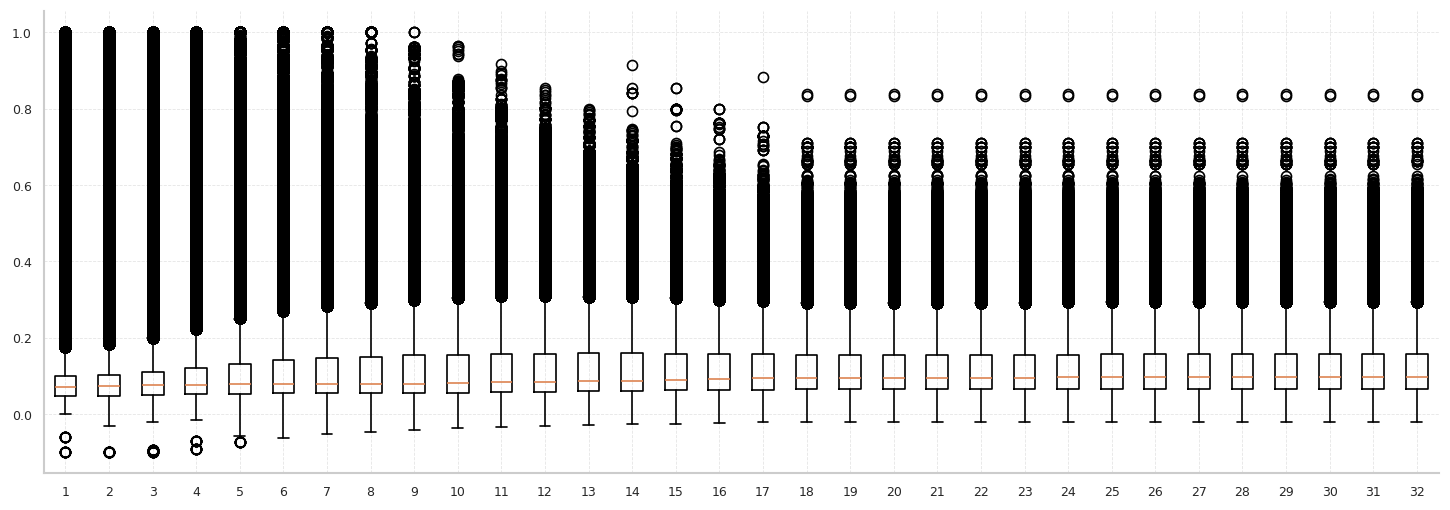

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(insulin_col_train_average)
#plt.yscale('log')
plt.show()

In [ ]:
insulin_col_train_average.max().max(),insulin_col_train_average.min().min()

### 3.0 Carb:

In [ ]:
carb_col_train = train.filter(regex='carbs|time|p_num|bg+1:00|hour|minute')
carb_col_test = test.filter(regex='carbs|time|p_num|bg+1:00|hour|minute')
carb_col_train["bg+1:00"] = train["bg+1:00"]

carb_col_train.head()

In [ ]:
all_car_col = list(carb_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#carb_col_train[all_car_col] = carb_col_train[all_car_col].clip(lower=0,upper=150).values
#carb_col_test[all_car_col] = carb_col_test[all_car_col].clip(lower=0,upper=150).values

carb_col_train[all_car_col] = np.log1p(carb_col_train[all_car_col].values)
carb_col_test[all_car_col] = np.log1p(carb_col_test[all_car_col].values)

In [ ]:
carb_col_train_ = carb_col_train.copy()

all_car_col = list(carb_col_train_.drop(columns=["p_num","bg+1:00"]).columns)

obs_index = set()

for c in all_car_col:
  susp = carb_col_train_[carb_col_train_[c]>=200]
  new_ind = set(susp.index)
  obs_index = obs_index.union(new_ind)

obs_index = list(obs_index)
print(len(obs_index))

In [ ]:
carb_col_train_.loc[obs_index,:]

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(carb_col_train_.drop(columns=["p_num","bg+1:00"]))
#plt.yscale('log')
plt.show()

In [ ]:
#carb_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')

Roll 48: 0.10844754105949585

Roll 51: 0.10916871269825933

Roll 54: 0.1097436462461668

Roll 57: 0.10981155231883521

Roll 60: 0.10981155231883521

Roll 63: 0.10981155231883521

Roll 66: 0.10981155231883521

Roll 69: 0.10981155231883521

Roll 72: 0.10981155231883521

In [ ]:
# for i in range(1,7,1):
#   carb_col_train_average = carb_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(carb_col_train_average.columns)
#   new_cols = [x.replace("carbs","carbs_av") for x in cols]

#   av_carb = pd.DataFrame(carb_col_train_average.values, columns=new_cols)
#   av_carb["bg+1:00"] = train["bg+1:00"].values
#   max_corr = av_carb.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

    Roll 1: 0.022195511800744333
    Roll 2: 0.028410323202085804
    Roll 3: 0.03161117486659187
    Roll 4: 0.032907347210821725
    Roll 5: 0.033098081839178416
    Roll 6: 0.03274034928483355

In [ ]:
carb_col_train_average = carb_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(5,min_periods=1).mean().T
carb_col_test_average = carb_col_test.drop(columns=["p_num"]).T.rolling(5,min_periods=1).mean().T

#carb_col_train_average.clip(lower=0,upper=2.9,inplace=True)
#carb_col_test_average.clip(lower=0,upper=2.9,inplace=True)

carb_col_train_average["bg+1:00"] = train["bg+1:00"]
carb_col_train_average.corr()["bg+1:00"][:-1].plot()
plt.show()
carb_col_train_average.drop(columns=["bg+1:00"],inplace=True)
cols = list(carb_col_train_average.columns)

In [ ]:
new_cols = [x.replace("carbs","carbs_av") for x in cols]
carb_col_train_average.columns = new_cols
carb_col_test_average.columns = new_cols

In [ ]:
carb_col_test_average.head()

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(carb_col_test_average)
#plt.yscale('log')
plt.show()

#### Add to Dataset:

In [ ]:
new_train = pd.concat([train,insulin_col_train_average,carb_col_train_average],ignore_index=False, axis=1)
new_test = pd.concat([test,insulin_col_train_average_test,carb_col_test_average],ignore_index=False, axis=1)
print(train.shape,new_train.shape)
print(test.shape,new_test.shape)

### 4.0 HR

In [ ]:
#np.log(hr_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:]).corr().style.background_gradient(cmap='rocket')

In [ ]:
all_hr_col = list(hr_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#hr_col_train[all_hr_col] = hr_col_train[all_hr_col].clip(lower=0,upper=150).values
#hr_col_train[all_hr_col] = hr_col_train[all_hr_col].clip(lower=0,upper=150).values

hr_col_train[all_hr_col] = np.log(hr_col_train[all_hr_col].values)
hr_col_test[all_hr_col] = np.log(hr_col_test[all_hr_col].values)

In [ ]:
# all_hr_col = list(hr_col_train.drop(columns=["p_num","hour","minute","bg+1:00"]).columns)

# obs_index = set()

# for c in all_hr_col:
#   susp = hr_col_train[hr_col_train[c]>=200]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [ ]:
# carb_col_train.loc[obs_index,:]

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(hr_col_train.drop(columns=["p_num","bg+1:00"]))
#plt.yscale('log')
plt.show()

In [ ]:
# for i in range(6,33,1):
#   hr_col_train_average = hr_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(hr_col_train_average.columns)
#   new_cols = [x.replace("hr","hr_av") for x in cols]

#   av_hr = pd.DataFrame(hr_col_train_average.values, columns=new_cols)
#   av_hr["bg+1:00"] = train["bg+1:00"].values
#   max_corr = av_hr.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

In [ ]:
#hr_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')
#hr_col_train.drop(columns=["p_num","hour",	"minute","bg+1:00"])# = np.log(hr_col_train.drop(columns=["p_num","hour",	"minute","bg+1:00"])).values
#hr_col_test.drop(columns=["p_num","hour",	"minute"])# = np.log(hr_col_test.drop(columns=["p_num","hour",	"minute"])).values

In [ ]:
hr_col_train_average = hr_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(32,min_periods=1).mean().T
hr_col_test_average = hr_col_test.drop(columns=["p_num"]).T.rolling(32,min_periods=1).mean().T
hr_col_train_average["bg+1:00"] = train["bg+1:00"]
cols = list(hr_col_train_average.columns)

In [ ]:
#hr_col_train_average.corr()["bg+1:00"][:-1].plot()

#### Add to the Dataset

In [ ]:
print(new_train.shape)
print(new_test.shape)

new_train.drop(all_hr_col, axis=1, inplace=True)
new_test.drop(all_hr_col, axis=1, inplace=True)
hr_col_train[all_hr_col]

new_train = pd.concat([new_train,hr_col_train[all_hr_col]],ignore_index=False, axis=1)
new_test = pd.concat([new_test,hr_col_test[all_hr_col]],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

### 5.0 STEPS:

In [ ]:
#step_col_train.drop(columns=["hour",	"minute"]).iloc[:,1:].corr().style.background_gradient(cmap='rocket')

In [ ]:
all_steps_col = list(step_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values
#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values

step_col_train[all_steps_col] = np.log1p(step_col_train[all_steps_col].values)
step_col_test[all_steps_col] = np.log1p(step_col_test[all_steps_col].values)

In [ ]:
all_steps_col = list(step_col_train.drop(columns=["p_num","bg+1:00"]).columns)

obs_index = set()

for c in all_steps_col:
  susp = step_col_train[step_col_train[c]>=200]
  new_ind = set(susp.index)
  obs_index = obs_index.union(new_ind)

obs_index = list(obs_index)
print(len(obs_index))

In [ ]:
carb_col_train.loc[obs_index,:]

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(step_col_train.drop(columns=["p_num","bg+1:00"]))
#plt.yscale('log')
plt.show()

In [ ]:
# for i in range(6,33,1):
#   step_col_train_average = step_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(step_col_train_average.columns)
#   new_cols = [x.replace("step","step_av") for x in cols]

#   av_step = pd.DataFrame(step_col_train_average.values, columns=new_cols)
#   av_step["bg+1:00"] = train["bg+1:00"].values
#   max_corr = av_step.corr()["bg+1:00"][:-1].max()

#   print(f"Roll {i}: {max_corr}")

In [ ]:
step_col_train_average = step_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(32,min_periods=1).mean().T
step_col_test_average = step_col_test.drop(columns=["p_num",]).T.rolling(32,min_periods=1).mean().T
step_col_train_average["bg+1:00"] = train["bg+1:00"]

#step_col_train_average.clip(lower=0,upper=650.0,inplace=True)
#step_col_test_average.clip(lower=0,upper=650.0,inplace=True)

cols = list(step_col_train_average.drop(columns=["bg+1:00"]).columns)

In [ ]:
step_col_train_average.corr()["bg+1:00"][:-1].plot()

In [ ]:
step_col_train_average.drop(columns=["bg+1:00"],inplace=True)

new_cols = [x.replace("steps","steps_av") for x in cols]
step_col_train_average.columns = new_cols
step_col_test_average.columns = new_cols

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(step_col_train_average)
#plt.yscale('log')
plt.show()

#### Add to Dataset:

In [ ]:
print(new_train.shape)
print(new_test.shape)

new_train = pd.concat([new_train,step_col_train_average],ignore_index=False, axis=1)
new_test = pd.concat([new_test,step_col_test_average],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

### 6.0 CALS:

In [ ]:
cal_col_train = train.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
cal_col_test = test.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
cal_col_train["bg+1:00"] = train["bg+1:00"]

In [ ]:
# cal_col_train.iloc[:,1:].corr().style.background_gradient(cmap='rocket')
cal_col_train.head()

,p_num,cals0,cals1,cals2,cals3,cals4,cals5,cals6,cals7,cals8,cals9,cals10,cals11,cals12,cals13,cals14,cals15,cals16,cals17,cals18,cals19,cals20,cals21,cals22,cals23,cals24,cals25,cals26,cals27,cals28,cals29,cals30,cals31,bg+1:00
0,p01,9.85,8.37,8.57,8.88,8.95,8.05,8.04,8.17,8.61,8.42,8.48,7.02,7.24,7.62,7.61,7.45,7.27,7.08,6.89,6.80,6.29,6.12,5.76,5.35,5.39,5.17,5.28,5.05,5.06,5.27,5.10,5.04,15.4
1,p01,9.05,9.15,8.05,8.04,8.25,8.61,8.42,8.48,7.02,7.24,7.62,7.61,7.45,7.27,7.08,6.89,6.80,6.29,6.08,5.76,5.35,5.39,5.17,5.28,5.10,5.15,5.31,5.10,5.04,5.15,5.35,4.95,17.2
2,p01,8.04,8.17,8.61,8.42,8.48,7.02,7.24,7.62,7.65,7.45,7.27,7.08,6.90,6.80,6.30,6.08,5.76,5.35,5.43,5.17,5.28,5.05,5.06,5.27,5.10,5.04,5.07,5.35,4.95,5.10,5.16,4.98,18.2
3,p01,8.43,8.53,7.09,7.26,7.74,7.83,7.54,7.24,7.14,6.93,6.51,6.10,5.96,5.63,5.32,5.37,5.16,5.27,5.04,5.05,5.22,5.03,5.03,5.06,5.33,4.91,5.10,5.14,4.98,4.96,5.06,4.84,18.4
4,p01,7.24,7.85,7.88,7.55,7.39,7.11,6.93,6.60,6.16,6.03,5.66,5.30,5.40,5.20,5.28,5.03,5.05,5.21,4.99,5.02,5.09,5.31,4.91,5.09,5.14,4.97,4.96,4.95,4.90,5.30,5.25,5.18,18.0


In [ ]:
all_cal_col = list(cal_col_train.drop(columns=["p_num","bg+1:00"]).columns)

#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values
#step_col_train[all_steps_col] = step_col_train[all_steps_col].clip(lower=0,upper=150).values

cal_col_train[all_cal_col] = np.log1p(cal_col_train[all_cal_col].values)
cal_col_test[all_cal_col] = np.log1p(cal_col_test[all_cal_col].values)

cal_col_train.loc[:,all_cal_col].min().min()

0.009950330853168083

In [ ]:
# all_steps_col = list(step_col_train.drop(columns=["p_num","hour","minute","bg+1:00"]).columns)

# obs_index = set()

# for c in all_car_col:
#   susp = step_col_train[step_col_train[c]>=200]
#   new_ind = set(susp.index)
#   obs_index = obs_index.union(new_ind)

# obs_index = list(obs_index)
# print(len(obs_index))

In [ ]:
# carb_col_train.loc[obs_index,:]

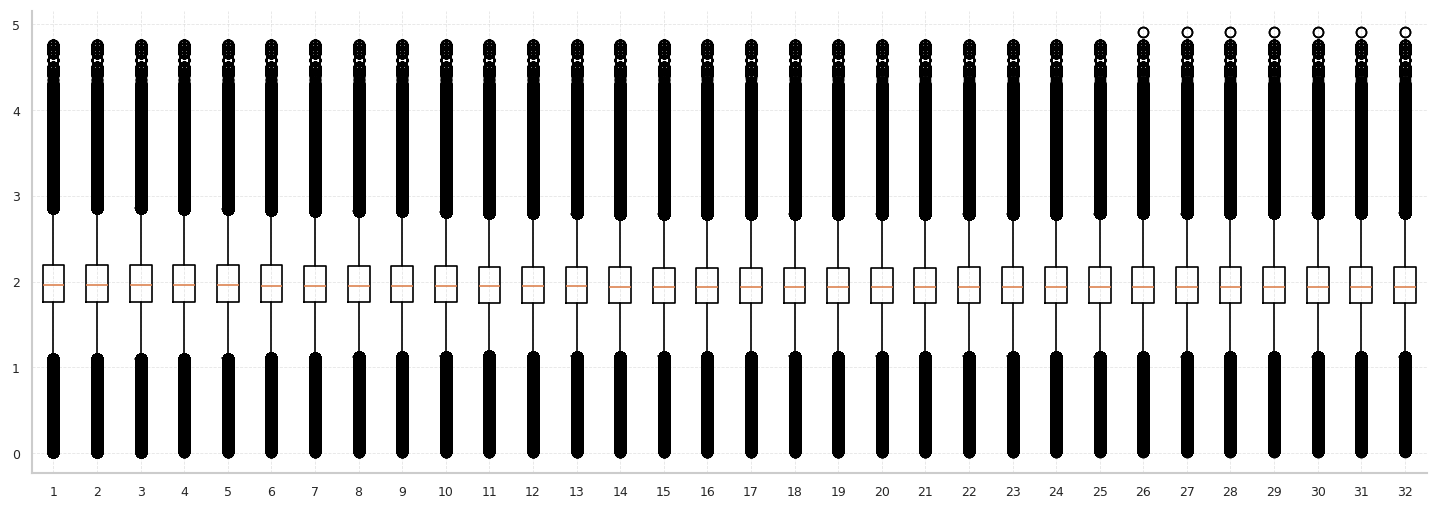

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(cal_col_train.drop(columns=["p_num","bg+1:00"]))
#plt.yscale('log')
plt.show()

In [ ]:
# for i in range(1,8,1):
#   cal_col_train_average = cal_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(i,min_periods=1).mean().T
#   cols = list(cal_col_train_average.columns)
#   new_cols = [x.replace("cal","cal_av") for x in cols]

#   av_cal = pd.DataFrame(cal_col_train_average.values, columns=new_cols)
#   av_cal["bg+1:00"] = train["bg+1:00"].values
#   max_corr = av_cal.corr()["bg+1:00"][:-1].min()

#   print(f"Roll {i}: {max_corr}")

In [ ]:
#-0.079615 - 0
#-0.085073 - 6
#-0.085243 - 7
#-0.085348 - 8
#-0.085443 - 9 <-
#-0.085423 - 10

In [ ]:
cal_col_train_average = cal_col_train.drop(columns=["p_num","bg+1:00"]).T.rolling(6,min_periods=1).mean().T
cal_col_test_average = cal_col_test.drop(columns=["p_num"]).T.rolling(6,min_periods=1).mean().T
cal_col_train_average["bg+1:00"] = train["bg+1:00"]
cols = list(cal_col_train_average.drop(columns=["bg+1:00"]).columns)

#cal_col_train_average.clip(lower=0,upper=75.0,inplace=True)
#cal_col_test_average.clip(lower=0,upper=75.0,inplace=True)

In [ ]:
#cal_col_train_average.corr().style.background_gradient(cmap='rocket')
cal_col_train_average.corr()["bg+1:00"][:-1].plot()

In [ ]:
cal_col_train_average.drop(columns=["bg+1:00"],inplace=True)

new_cols = [x.replace("cals","cals_av") for x in cols]
cal_col_train_average.columns = new_cols
cal_col_test_average.columns = new_cols

In [ ]:
fig, ax =  plt.subplots(figsize=(15,5))
ax.boxplot(cal_col_train_average)
#plt.yscale('log')
plt.show()

#### Add to Dataset:

In [ ]:
print(new_train.shape)
print(new_test.shape)

new_train = pd.concat([new_train,cal_col_train_average],ignore_index=False, axis=1)
new_test = pd.concat([new_test,cal_col_test_average],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

### 7.0 ACTIVITY

In [ ]:
act_col_train.iloc[:,1:].corr()["bg+1:00"][:-1].plot()#.style.background_gradient(cmap='rocket')

In [ ]:
#-0.028335 - 0
#-0.028335 - 0

## Feature Generation:

#### 1.0 Net Intake: Carb-Cals

Div 6.7: 0.13041174178382123

Div 6.8: 0.13042215128319495

Div 6.9: 0.13042387176446235

Div 7.0: 0.13041741921890446

Div 7.1: 0.13040328344423044

In [ ]:
# for i in range(1,15):
#   net_intake = carb_col_train_average.values-cal_col_train_average.div(i/10).values
#   new_cols = [x.replace("cals","intake") for x in cols]

#   net_intake = pd.DataFrame(net_intake, columns=new_cols)
#   net_intake["bg+1:00"] = train["bg+1:00"].values
#   max_corr = net_intake.corr()["bg+1:00"][:-1].max()

#   print(f"Div {i/10}: {max_corr}")

In [ ]:
net_intake = carb_col_train_average.values-cal_col_train_average.div(0.6).values
net_intake_test = carb_col_test_average.values-cal_col_test_average.div(0.6).values
new_cols = [x.replace("cals","intake") for x in cols]

net_intake = pd.DataFrame(net_intake, columns=new_cols, index=carb_col_train_average.index)
net_intake_test = pd.DataFrame(net_intake_test, columns=new_cols, index=carb_col_test_average.index)
net_intake["bg+1:00"] = train["bg+1:00"].values
max_corr = net_intake.corr()["bg+1:00"][:-1].max()

print(f"Corr Max: {max_corr}")
net_intake.corr()["bg+1:00"][:-1].plot()
plt.show()
net_intake.drop(columns=["bg+1:00"],inplace=True)

In [ ]:
print(new_train.shape)
print(new_test.shape)

new_train = pd.concat([new_train,net_intake],ignore_index=False, axis=1)
new_test = pd.concat([new_test,net_intake_test],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

(2100934, 354)
(3644, 354)
(2100934, 386)
(3644, 386)


#### 1.0 Net Dampner: Insuline-Cals

Div 63: 0.21467743225877814

Div 64: 0.21472359148484518

Div 65: 0.21475169624048407

Div 66: 0.21476292342196002

Div 67: 0.21475838314463036

Div 68: 0.2147391220452472

Div 69: 0.21470612648920334

Div 70: 0.21466032567432106

In [ ]:
insulin_col_train_average.max().max(),cal_col_train_average.max().max()

In [ ]:
# for i in range(1,25):
#   net_brakes = insulin_col_train_average.values-cal_col_train_average.div(i).values
#   cols = list(insulin_col_train_average.columns)
#   new_cols = [x.replace("insuline","brake") for x in cols]

#   net_brakes = pd.DataFrame(net_brakes, columns=new_cols, index=insulin_col_train_average.index)
#   net_brakes["bg+1:00"] = train["bg+1:00"].values
#   max_corr = net_brakes.corr()["bg+1:00"][:-1].max()

#   print(f"Div {i}: {max_corr}")

In [ ]:
net_brakes = insulin_col_train_average.values-cal_col_train_average.div(10).values
net_brakes_test = insulin_col_train_average_test.values-cal_col_test_average.div(10).values
cols = list(insulin_col_train_average.columns)
new_cols = [x.replace("insulin_av","brake") for x in cols]

net_brakes = pd.DataFrame(net_brakes, columns=new_cols, index=carb_col_train_average.index)
net_brakes_test = pd.DataFrame(net_brakes_test, columns=new_cols, index=carb_col_test_average.index)
net_brakes["bg+1:00"] = train["bg+1:00"].values
max_corr = net_brakes.corr()["bg+1:00"][:-1].max()

print(f"Corr Max: {max_corr}")
net_brakes.corr()["bg+1:00"][:-1].plot()
plt.show()
net_brakes.drop(columns=["bg+1:00"],inplace=True)

In [ ]:
display(net_brakes.head())
display(net_brakes_test.head())

In [ ]:
print(new_train.shape)
print(new_test.shape)

new_train = pd.concat([new_train,net_brakes],ignore_index=False, axis=1)
new_test = pd.concat([new_test,net_brakes_test],ignore_index=False, axis=1)

print(new_train.shape)
print(new_test.shape)

## Dataset Cleaning:

All the Data that have been replaced by rolling average are now removed:

In [ ]:
new_train.drop(columns=insulin_col_train.iloc[:,1:-1].columns, inplace=True)
new_test.drop(columns=insulin_col_train.iloc[:,1:-1].columns, inplace=True)

new_train.drop(columns=step_col_train.iloc[:,1:-1].columns, inplace=True)
new_test.drop(columns=step_col_train.iloc[:,1:-1].columns, inplace=True)

new_train.drop(columns=carb_col_train.iloc[:,1:-1].columns, inplace=True)
new_test.drop(columns=carb_col_train.iloc[:,1:-1].columns, inplace=True)

new_train.drop(columns=cal_col_train.iloc[:,1:-1].columns, inplace=True)
new_test.drop(columns=cal_col_train.iloc[:,1:-1].columns, inplace=True)

In [ ]:
new_train.shape,new_test.shape

((2100934, 290), (3644, 290))

In [ ]:
new_train.drop(columns=["p_num","bg+1:00"]).shape[1]/32

## Save to Excel:

In [ ]:
#new_train.reset_index(inplace=True)
#new_test.reset_index(inplace=True)
#new_train.head()

In [ ]:
#del df_train,df_test
gc.collect()

In [ ]:
#new_train = pd.read_csv("temp_train.csv")
#new_test = pd.read_csv("temp_test.csv")

In [ ]:
pnum_df_train = new_train.filter(regex='p_num')
pnum_df_test = new_test.filter(regex='p_num')

act_df_train = new_train.filter(regex='activity')
act_df_test = new_test.filter(regex='activity')

bg_df_train = new_train.filter(regex='bg').drop(columns=["bg+1:00"])
bg_df_test = new_test.filter(regex='bg').drop(columns=["bg+1:00"])

ins_df_train = new_train.filter(regex='insulin_av')
ins_df_test = new_test.filter(regex='insulin_av')

cals_df_train = new_train.filter(regex='cals_av')
cals_df_test = new_test.filter(regex='cals_av')

brake_df_train = new_train.filter(regex='brake')
brake_df_test = new_test.filter(regex='brake')

car_df_train = new_train.filter(regex='carbs_av')
car_df_test = new_test.filter(regex='carbs_av')

hr_df_train = new_train.filter(regex='hr')
hr_df_test = new_test.filter(regex='hr')

intake_df_train = new_train.filter(regex='intake')
intake_df_test = new_test.filter(regex='intake')

step_df_train = new_train.filter(regex='steps_av')
step_df_test = new_test.filter(regex='steps_av')

target_df_train = new_train["bg+1:00"]
target_df_test = new_test["bg+1:00"]

print(new_train.shape)
print(new_test.shape)
new_train = pd.concat([pnum_df_train,act_df_train,bg_df_train,ins_df_train,cals_df_train,brake_df_train,car_df_train,hr_df_train,intake_df_train,step_df_train,target_df_train],axis=1)
new_test = pd.concat([pnum_df_test,act_df_test,bg_df_test,ins_df_test,cals_df_test,brake_df_test,car_df_test,hr_df_test,intake_df_test,step_df_test,target_df_test],axis=1)
print(new_train.shape)
print(new_test.shape)

In [ ]:
new_train.to_csv("final_train.csv",index=False)
new_test.to_csv("final_test.csv",index=False)

#new_train = pd.read_csv("final_train.csv")
#new_test = pd.read_csv("final_test.csv")

In [ ]:
new_train.head()

,p_num,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,...,intake15,intake16,intake17,intake18,intake19,intake20,intake21,intake22,intake23,intake24,intake25,intake26,intake27,intake28,intake29,intake30,intake31,steps_av0,steps_av1,steps_av2,steps_av3,steps_av4,steps_av5,steps_av6,steps_av7,steps_av8,steps_av9,steps_av10,steps_av11,steps_av12,steps_av13,steps_av14,steps_av15,steps_av16,steps_av17,steps_av18,steps_av19,steps_av20,steps_av21,steps_av22,steps_av23,steps_av24,steps_av25,steps_av26,steps_av27,steps_av28,steps_av29,steps_av30,steps_av31,bg+1:00
0,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,9.6,9.6,9.6,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,...,-3.578139,-3.540208,-3.542278,-3.530222,-3.502455,-3.456227,-3.408655,-3.352652,-3.285725,-3.227152,-3.162034,-3.120608,-3.075372,-3.045007,-3.041485,-3.028584,-3.022669,3.496508,3.751920,3.837058,3.834954,3.850368,3.850331,3.790853,3.768361,3.711665,3.687072,3.609449,3.491763,3.392184,3.333095,3.286826,3.246341,3.150052,3.052066,3.000875,2.948127,2.912369,2.903082,2.824627,2.793578,2.797449,2.764698,2.702991,2.688691,2.595977,2.620518,2.648776,2.652645,15.4
1,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,9.7,9.7,9.5,9.4,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,...,-3.530222,-3.502455,-3.456227,-3.407090,-3.351087,-3.284160,-3.225587,-3.160469,-3.119043,-3.077658,-3.051389,-3.049633,-3.036732,-3.030816,-3.025006,-3.036163,-3.026980,3.871201,3.891612,3.877791,3.758642,3.723618,3.646031,3.628935,3.529470,3.381443,3.263021,3.199560,3.158601,3.118636,3.010836,2.902533,2.851090,2.797844,2.764476,2.761506,2.678362,2.649842,2.660775,2.629694,2.565899,2.551152,2.527873,2.553466,2.587146,2.593541,2.592588,2.553675,2.508204,17.2
2,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,9.2,9.2,9.0,8.9,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,...,-3.407823,-3.351819,-3.284892,-3.227701,-3.162583,-3.120776,-3.077105,-3.046741,-3.043219,-3.028584,-3.022669,-3.013221,-3.026665,-3.021576,-3.013941,-3.016659,-3.013886,3.433987,3.522453,3.434334,3.457341,3.332515,3.143300,2.991320,2.938024,2.912471,2.885130,2.769158,2.653919,2.599457,2.552775,2.521220,2.532896,2.448527,2.420604,2.442320,2.417499,2.354695,2.352327,2.250052,2.288718,2.337030,2.348646,2.350470,2.316036,2.274055,2.234874,2.198220,2.129526,18.2
3,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7,8.7,8.7,8.6,8.5,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,...,-3.195398,-3.140354,-3.105821,-3.066439,-3.041009,-3.036579,-3.021342,-3.015417,-3.005954,-3.018981,-3.012478,-3.007066,-3.012088,-3.009775,-3.005153,-2.993044,-2.989735,3.555348,3.163968,2.876841,2.706937,2.678539,2.671959,2.667259,2.535031,2.407394,2.305284,2.272613,2.256516,2.291249,2.127588,2.132231,2.179615,2.146075,2.087883,2.099183,1.994224,2.057937,2.120485,2.148837,2.159214,2.128298,2.073100,2.037007,2.003493,1.934407,1.893032,1.831966,1.774717,18.4
4,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.4,8.4,8.4,8.3,8.2,8.1,8.2,8.2,8.3,8.7,9.2,9.6,10.1,10.6,11.1,11.3,11.6,...,-3.069898,-3.043214,-3.039218,-3.020827,-3.012643,-3.004109,-3.016717,-3.010214,-3.004793,-3.011664,-3.009347,-3.003353,-2.987035,-2.986565,-2.995982,-3.000914,-3.010518,2.197225,2

In [ ]:
new_test.head()

,p_num,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,...,intake15,intake16,intake17,intake18,intake19,intake20,intake21,intake22,intake23,intake24,intake25,intake26,intake27,intake28,intake29,intake30,intake31,steps_av0,steps_av1,steps_av2,steps_av3,steps_av4,steps_av5,steps_av6,steps_av7,steps_av8,steps_av9,steps_av10,steps_av11,steps_av12,steps_av13,steps_av14,steps_av15,steps_av16,steps_av17,steps_av18,steps_av19,steps_av20,steps_av21,steps_av22,steps_av23,steps_av24,steps_av25,steps_av26,steps_av27,steps_av28,steps_av29,steps_av30,steps_av31,bg+1:00
0,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,13.7,13.8,13.8,13.9,14.1,14.4,14.6,14.4,...,-2.934512,-2.934512,-2.939260,-2.939260,-2.934512,-2.934512,-2.934512,-2.939260,-2.939260,-2.944009,-2.944009,-2.944009,-2.944009,-2.939260,-2.934512,-2.934512,-2.989119,1.098612,0.549306,0.597253,0.621227,0.496981,0.414151,0.511931,0.447940,0.398169,0.578074,0.525522,0.481729,0.444673,0.412910,0.504834,0.541945,0.574690,0.632176,0.598903,0.666254,0.634527,0.605685,0.609488,0.690966,0.734997,0.706728,0.706225,0.681003,0.657520,0.672223,0.650538,0.673531,NaN
1,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,6.6,6.1,5.7,5.4,5.0,4.8,4.6,4.4,...,-4.192440,-4.208452,-4.163563,-4.018333,-4.088591,-4.054094,-3.968798,-3.991841,-3.849702,-3.904638,-3.936774,-4.064059,-3.640718,-3.808380,-4.231474,-4.473468,-4.697565,6.204558,6.206574,5.358903,5.091792,4.982093,4.778611,4.690078,4.511080,4.310744,4.219789,4.154036,4.082520,4.079484,3.981524,3.958595,3.921639,3.907947,3.871844,3.789252,3.812214,3.802628,3.718232,3.716956,3.562083,3.560654,3.603069,3.659836,3.711048,3.790702,3.874554,3.941017,4.014064,NaN
2,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,5.2,5.2,5.2,5.3,5.3,5.1,4.9,4.7,...,-4.206451,-4.173119,-3.988898,-3.599300,-3.281106,-3.388110,-3.618432,-3.892539,-4.202972,-4.366246,-4.716735,-4.781506,-4.510655,-4.236547,-4.033225,-4.210156,-3.972670,4.234107,4.332462,4.318461,4.379933,4.513917,4.655927,4.832852,5.027735,5.150104,5.110452,4.892052,4.828309,4.924235,4.999567,4.666263,4.567811,4.472319,4.223857,4.001548,3.936874,3.956251,4.032548,4.100469,4.158493,4.177152,4.254582,4.235437,4.175777,4.114470,4.088395,4.138736,4.142166,NaN
3,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,3.4,3.3,3.4,3.6,3.7,4.2,4.6,5.1,...,-2.948520,-2.948520,-2.934512,-2.929763,-2.934512,-2.939260,-2.939260,-2.939260,-2.939260,-2.939260,-2.943929,-2.943929,-2.948677,-2.948677,-2.948677,-2.953426,-2.944009,0.000000,1.354025,1.439163,1.079372,1.185385,1.103346,0.945725,0.827509,0.735564,0.910498,1.004626,1.178494,1.264963,1.174608,1.096301,1.027782,0.967325,0.913584,0.865501,0.942121,1.032173,1.016762,1.032829,1.056854,1.042306,1.002217,1.042115,1.004896,1.063626,1.051276,1.039724,1.007232,NaN
4,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,3.7,3.4,3.3,3.2,3.1,3.0,3.0,2.9,...,-2.987501,-2.987501,-2.929763,-2.929763,-2.934512,-2.934512,-2.948520,-3.133291,-3.133291,-3.133291,-3.128542,-3.133291,-3.119282,-2.934512,-2.934512,-2.934512,-2.934512,0.00

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/new_test.csv", index_col=0)
df_test.head()

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,...,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,hour,minute,obv_n
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,9.2,9.2,9.5,9.9,10.2,10.2,10.3,10.3,10.3,10.2,10.2,10.7,11.2,11.7,12.3,12.9,13.5,14.1,14.7,15.3,15.2,15.1,15.0,14.8,14.6,14.4,14.1,13.9,13.6,13.3,12.9,12.6,12.4,12.1,11.9,11.7,11.6,11.4,11.6,11.7,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,45,8459.0
p01_8460,p01,9.9,9.9,9.9,9.7,9.6,9.4,9.3,9.2,9.1,8.8,8.6,8.3,8.1,7.9,7.7,7.7,7.8,7.8,7.8,7.7,7.7,7.5,7.3,7.1,7.1,7.1,7.1,7.0,6.8,6.7,6.7,6.6,6.6,6.7,6.8,6.9,7.5,8.0,8.6,9.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,11,25,8460.0
p01_8461,p01,5.5,5.5,5.5,5.5,5.5,5.4,5.3,5.2,5.2,5.2,5.2,5.2,5.2,5.1,5.1,5.1,5.1,5.1,5.0,4.8,4.7,4.6,4.5,4.4,4.5,4.7,4.8,5.2,5.7,6.1,6.4,6.6,6.9,6.7,6.5,6.3,5.9,5.6,5.2,5.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,45,8461.0
p01_8462,p01,3.4,3.4,3.6,3.7,3.9,4.2,4.4,4.7,4.5,4.3,4.1,3.9,3.7,3.5,3.6,3.8,3.9,4.0,4.2,4.3,4.4,4.5,4.6,4.3,4.1,3.8,3.6,3.3,3.1,3.3,3.4,3.6,3.8,4.0,4.2,4.2,4.2,4.2,4.2,4.1,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,30,8462.0
p01_8463,p01,8.3,8.3,8.3,8.9,9.4,10.0,10.7,11.5,12.2,12.4,12.6,12.8,12.8,12.8,12.8,12.6,12.4,12.2,11.9,11.7,11.4,11.6,11.9,12.1,12.0,11.9,11.8,11.4,11.1,10.7,10.3,10.0,9.6,9.4,9.1,8.9,8.7,8.6,8.4,8.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,20,8463.0


In [ ]:
new_test.index = df_test.index
new_test.head()

,p_num,activity0,activity1,activity2,activity3,activity4,activity5,activity6,activity7,activity8,activity9,activity10,activity11,activity12,activity13,activity14,activity15,activity16,activity17,activity18,activity19,activity20,activity21,activity22,activity23,activity24,activity25,activity26,activity27,activity28,activity29,activity30,activity31,bg0,bg1,bg2,bg3,bg4,bg5,bg6,bg7,bg8,bg9,bg10,bg11,bg12,bg13,bg14,bg15,bg16,...,intake15,intake16,intake17,intake18,intake19,intake20,intake21,intake22,intake23,intake24,intake25,intake26,intake27,intake28,intake29,intake30,intake31,steps_av0,steps_av1,steps_av2,steps_av3,steps_av4,steps_av5,steps_av6,steps_av7,steps_av8,steps_av9,steps_av10,steps_av11,steps_av12,steps_av13,steps_av14,steps_av15,steps_av16,steps_av17,steps_av18,steps_av19,steps_av20,steps_av21,steps_av22,steps_av23,steps_av24,steps_av25,steps_av26,steps_av27,steps_av28,steps_av29,steps_av30,steps_av31,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,12.2,12.6,12.9,13.2,13.5,13.8,13.8,13.7,13.7,13.8,13.8,13.9,14.1,14.4,14.6,14.4,...,-2.934512,-2.934512,-2.939260,-2.939260,-2.934512,-2.934512,-2.934512,-2.939260,-2.939260,-2.944009,-2.944009,-2.944009,-2.944009,-2.939260,-2.934512,-2.934512,-2.989119,1.098612,0.549306,0.597253,0.621227,0.496981,0.414151,0.511931,0.447940,0.398169,0.578074,0.525522,0.481729,0.444673,0.412910,0.504834,0.541945,0.574690,0.632176,0.598903,0.666254,0.634527,0.605685,0.609488,0.690966,0.734997,0.706728,0.706225,0.681003,0.657520,0.672223,0.650538,0.673531,NaN
p01_8460,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,9.3,9.7,9.5,9.3,9.1,8.6,8.2,7.7,7.2,6.6,6.1,5.7,5.4,5.0,4.8,4.6,4.4,...,-4.192440,-4.208452,-4.163563,-4.018333,-4.088591,-4.054094,-3.968798,-3.991841,-3.849702,-3.904638,-3.936774,-4.064059,-3.640718,-3.808380,-4.231474,-4.473468,-4.697565,6.204558,6.206574,5.358903,5.091792,4.982093,4.778611,4.690078,4.511080,4.310744,4.219789,4.154036,4.082520,4.079484,3.981524,3.958595,3.921639,3.907947,3.871844,3.789252,3.812214,3.802628,3.718232,3.716956,3.562083,3.560654,3.603069,3.659836,3.711048,3.790702,3.874554,3.941017,4.014064,NaN
p01_8461,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,4.7,4.8,5.0,5.1,5.1,5.1,5.1,5.1,5.2,5.2,5.2,5.3,5.3,5.1,4.9,4.7,...,-4.206451,-4.173119,-3.988898,-3.599300,-3.281106,-3.388110,-3.618432,-3.892539,-4.202972,-4.366246,-4.716735,-4.781506,-4.510655,-4.236547,-4.033225,-4.210156,-3.972670,4.234107,4.332462,4.318461,4.379933,4.513917,4.655927,4.832852,5.027735,5.150104,5.110452,4.892052,4.828309,4.924235,4.999567,4.666263,4.567811,4.472319,4.223857,4.001548,3.936874,3.956251,4.032548,4.100469,4.158493,4.177152,4.254582,4.235437,4.175777,4.114470,4.088395,4.138736,4.142166,NaN
p01_8462,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,4.1,4.2,4.2,4.1,4.0,3.9,3.8,3.6,3.4,3.3,3.4,3.6,3.7,4.2,4.6,5.1,...,-2.948520,-2.948520,-2.934512,-2.929763,-2.934512,-2.939260,-2.939260,-2.939260,-2.939260,-2.939260,-2.943929,-2.943929,-2.948677,-2.948677,-2.948677,-2.953426,-2.944009,0.000000,1.354025,1.439163,1.079372,1.185385,1.103346,0.945725,0.827509,0.735564,0.910498,1.004626,1.178494,1.264963,1.174608,1.096301,1.027782,0.967325,0.913584,0.865501,0.942121,1.032173,1.016762,1.032829,1.056854,1.042306,1.002217,1.042115,1.004896,1.063626,1.051276,1.039724,1.007232,NaN
p01_8463,p01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.7,7.3,6.8,6.3,5.8,5.3,4.8,4.3,4.0,3.7,3.4,3.3,3.2,3.1,3.0,3.0,2.9,...,-2.987501,-2.987501,-2.929763,-2.92

In [ ]:
new_test.to_csv("final_test.csv",index=True)

In [ ]:
new_test.shape

(3644, 290)

### Feature Generation step 2

In [ ]:
bg_df_train = new_train.filter(regex='bg').drop(columns=["bg+1:00"])
bg_df_test = new_test.filter(regex='bg').drop(columns=["bg+1:00"])

ins_df_train = new_train.filter(regex='insulin_av')
ins_df_test = new_test.filter(regex='insulin_av')

In [ ]:
ins_df_train.shape,bg_df_train.shape

In [ ]:
bg_df_train.max().max(),ins_df_train.max().max()

In [ ]:
cols = list(bg_df_train.columns)

for i in range(1,15):
  net_intake = bg_df_train.values+ins_df_train.multiply(i).values
  new_cols = [x.replace("bg","prod_ins_bg") for x in cols]

  net_intake = pd.DataFrame(net_intake, columns=new_cols)
  net_intake["bg+1:00"] = new_train["bg+1:00"].values
  max_corr = net_intake.corr()["bg+1:00"][:-1].max()

  print(f"Div {i}: {max_corr}")